In [384]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
import sklearn.datasets as datasets
import graphviz

In [385]:


data_customer = pd.read_csv('../data/marketing_campaign.csv', header=0, sep=';')

In [386]:
# ذخیره سن افراد در ستون Age
data_customer['Age'] = 2021 - data_customer['Year_Birth']

data_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138,0,0,2019-09-04,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344,1,1,2021-03-08,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613,0,0,2020-08-21,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646,1,0,2021-02-10,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293,1,0,2021-01-19,94,173,...,0,0,0,0,0,0,3,11,0,40


In [387]:
# Spending ذخیره تعداد کل  خرید افراد
data_customer['Spending'] = data_customer['WinesProducts'] + data_customer['FruitsProducts'] + data_customer[
    'MeatProducts'] + data_customer['FishProducts'] + data_customer['SweetProducts'] + data_customer['GoldProducts']
data_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending
0,5524,1957,Graduation,Single,58138,0,0,2019-09-04,58,635,...,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344,1,1,2021-03-08,38,11,...,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613,0,0,2020-08-21,26,426,...,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646,1,0,2021-02-10,26,11,...,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293,1,0,2021-01-19,94,173,...,0,0,0,0,0,3,11,0,40,422


In [388]:
# تبدیل تاریخ ورود مشتری از رشته به نوع تاریخ
last_date = date(2021, 10, 4)
data_customer['Seniority'] = pd.to_datetime(data_customer['Dt_Customer'],
                                            dayfirst=True, format='%Y-%m-%d')
data_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority
0,5524,1957,Graduation,Single,58138,0,0,2019-09-04,58,635,...,0,0,0,0,3,11,1,64,1617,2019-09-04
1,2174,1954,Graduation,Single,46344,1,1,2021-03-08,38,11,...,0,0,0,0,3,11,0,67,27,2021-03-08
2,4141,1965,Graduation,Together,71613,0,0,2020-08-21,26,426,...,0,0,0,0,3,11,0,56,776,2020-08-21
3,6182,1984,Graduation,Together,26646,1,0,2021-02-10,26,11,...,0,0,0,0,3,11,0,37,53,2021-02-10
4,5324,1981,PhD,Married,58293,1,0,2021-01-19,94,173,...,0,0,0,0,3,11,0,40,422,2021-01-19


In [389]:
# محاسبه تعداد ماه ورود
data_customer['Seniority'] = pd.to_numeric(
    data_customer['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days,
    downcast='integer') / 30
data_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority
0,5524,1957,Graduation,Single,58138,0,0,2019-09-04,58,635,...,0,0,0,0,3,11,1,64,1617,25
1,2174,1954,Graduation,Single,46344,1,1,2021-03-08,38,11,...,0,0,0,0,3,11,0,67,27,7
2,4141,1965,Graduation,Together,71613,0,0,2020-08-21,26,426,...,0,0,0,0,3,11,0,56,776,14
3,6182,1984,Graduation,Together,26646,1,0,2021-02-10,26,11,...,0,0,0,0,3,11,0,37,53,8
4,5324,1981,PhD,Married,58293,1,0,2021-01-19,94,173,...,0,0,0,0,3,11,0,40,422,9


In [390]:
# تغیر نام ستون های مربوط به فاکتور
data_customer = data_customer.rename(
    columns={'NumWebPurchases': "Web", 'NumCatalogPurchases': 'Catalog',
             'NumStorePurchases': 'Store'})
# تغیر مقادیرMarital_Status به Alone , In couple
data_customer['Marital_Status'] = data_customer['Marital_Status'].replace(
    {'Divorced': 'Alone', 'Single': 'Alone', 'Married': 'In couple',
     'Together': 'In couple', 'Absurd': 'Alone', 'Widow': 'Alone',
     'YOLO': 'Alone'})
# Education => Postgraduate ,  Undergraduate
data_customer['Education'] = data_customer['Education'].replace(
    {'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
     'Graduation': 'Postgraduate', 'Master': 'Postgraduate',
     'PhD': 'Postgraduate'})

In [391]:
# محاسبه مجمون نوجوانان و کودکان
data_customer['Children'] = data_customer['Kidhome'] + data_customer['Teenhome']
# فرزند داشتن یا نداشن
data_customer['Has_child'] = np.where(data_customer.Children > 0, 'Has child', 'No child')
data_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority,Children,Has_child
0,5524,1957,Postgraduate,Alone,58138,0,0,2019-09-04,58,635,...,0,0,3,11,1,64,1617,25,0,No child
1,2174,1954,Postgraduate,Alone,46344,1,1,2021-03-08,38,11,...,0,0,3,11,0,67,27,7,2,Has child
2,4141,1965,Postgraduate,In couple,71613,0,0,2020-08-21,26,426,...,0,0,3,11,0,56,776,14,0,No child
3,6182,1984,Postgraduate,In couple,26646,1,0,2021-02-10,26,11,...,0,0,3,11,0,37,53,8,1,Has child
4,5324,1981,Postgraduate,In couple,58293,1,0,2021-01-19,94,173,...,0,0,3,11,0,40,422,9,1,Has child


In [392]:
data_customer['Children'].replace(
    {3: "3 children", 2: '2 children', 1: '1 child', 0: "No child"},
    inplace=True)
data_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority,Children,Has_child
0,5524,1957,Postgraduate,Alone,58138,0,0,2019-09-04,58,635,...,0,0,3,11,1,64,1617,25,No child,No child
1,2174,1954,Postgraduate,Alone,46344,1,1,2021-03-08,38,11,...,0,0,3,11,0,67,27,7,2 children,Has child
2,4141,1965,Postgraduate,In couple,71613,0,0,2020-08-21,26,426,...,0,0,3,11,0,56,776,14,No child,No child
3,6182,1984,Postgraduate,In couple,26646,1,0,2021-02-10,26,11,...,0,0,3,11,0,37,53,8,1 child,Has child
4,5324,1981,Postgraduate,In couple,58293,1,0,2021-01-19,94,173,...,0,0,3,11,0,40,422,9,1 child,Has child


In [393]:
data_customer = data_customer.rename(columns={'WinesProducts': "Wines", 'FruitsProducts': 'Fruits',
                                              'MeatProducts': 'Meat',
                                              'FishProducts': 'Fish',
                                              'SweetProducts': 'Sweets',
                                              'GoldProducts': 'Gold'})

data_customer_new = data_customer[
    ['Age', 'Education', 'Marital_Status', 'Income', 'Spending', 'Seniority',
     'Has_child', 'Children', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
     'Gold']]
data_customer_new.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,64,Postgraduate,Alone,58138,1617,25,No child,No child,635,88,546,172,88,88
1,67,Postgraduate,Alone,46344,27,7,Has child,2 children,11,1,6,2,1,6
2,56,Postgraduate,In couple,71613,776,14,No child,No child,426,49,127,111,21,42
3,37,Postgraduate,In couple,26646,53,8,Has child,1 child,11,4,20,10,3,5
4,40,Postgraduate,In couple,58293,422,9,Has child,1 child,173,43,118,46,27,15


In [394]:
data_customer_new.head()
data_customer_new.count()

Age               2244
Education         2244
Marital_Status    2244
Income            2220
Spending          2244
Seniority         2244
Has_child         2244
Children          2244
Wines             2244
Fruits            2244
Meat              2244
Fish              2244
Sweets            2244
Gold              2244
dtype: int64

In [395]:
# حذف داده های گم شده
data_customer_new = data_customer_new.dropna(subset=['Income'])
data_customer_new.head()
data_customer_new.count()

Age               2220
Education         2220
Marital_Status    2220
Income            2220
Spending          2220
Seniority         2220
Has_child         2220
Children          2220
Wines             2220
Fruits            2220
Meat              2220
Fish              2220
Sweets            2220
Gold              2220
dtype: int64

In [396]:
# حذف داده های پرت
data_customer_new = data_customer_new[data_customer_new['Income'] < 600000]
data_customer_new.head()
data_customer_new.count()

Age               2215
Education         2215
Marital_Status    2215
Income            2215
Spending          2215
Seniority         2215
Has_child         2215
Children          2215
Wines             2215
Fruits            2215
Meat              2215
Fish              2215
Sweets            2215
Gold              2215
dtype: int64

# خوشه بندی

### در اینجا ما از چهار نوع مشتری با وزن یکسان استفاده کرده ایم


- stars : مشتری های قدیمی با دخل و خرج بالا
- Need attention : مشتری های جدید با دخل و خرج پایین
- High potential : مشتری های جدید با دخل و خرج بالا
- Leaky bucket : مشتری های قدیمی با دخل و خرج پایین


ابتدا داده هارا نرمال سازی کرده سپس با توجه به معیار های مذکور مشتری هارا خوشه بندی میکنیم

# تغیر بازه داده ها به بازه ای مشخص

In [397]:
scaler = StandardScaler()
dataset_temp = data_customer_new[['Income', 'Seniority', 'Spending']]
X_std = scaler.fit_transform(dataset_temp)
X_std

array([[ 0.28660409,  1.5294575 ,  1.67501109],
       [-0.26140705, -1.1874353 , -0.96272705],
       [ 0.91272331, -0.20619815,  0.2798301 ],
       ...,
       [ 0.2328438 , -0.98034002,  1.05124409],
       [ 0.80269361, -0.97540918,  0.39098007],
       [ 0.0417787 ,  1.32729306, -0.7221786 ]])

# نرمال سازی دیتا scale شده با تابع normalize

In [398]:
X = normalize(X_std, norm='l2')
X

array([[ 0.12535865,  0.66897413,  0.73263826],
       [-0.16855574, -0.76566042, -0.62076814],
       [ 0.93452476, -0.21112343,  0.28651416],
       ...,
       [ 0.15990281, -0.67323727,  0.72192982],
       [ 0.60702123, -0.73763398,  0.29567098],
       [ 0.02763837,  0.87806015, -0.4777515 ]])

 # بررسی و قراردادن لیبل تارگت با استفاده از گوس

In [399]:
gmm = GaussianMixture(n_components=4, covariance_type='spherical', max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp = dataset_temp.replace({0: 'مشتری های قدیمی با دخل و خرج بالا', 1: 'مشتری های جدید با دخل و خرج پایین', 2: 'مشتری های جدید با دخل و خرج بالا', 3: 'مشتری های قدیمی با دخل و خرج پایین'})
data = data_customer_new.merge(dataset_temp.Cluster, left_index=True, right_index=True)

/Users/mr.rezoo/.virtualenvs/final_dataMinig_project/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [400]:
data.head()


,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold,Cluster
0,64,Postgraduate,Alone,58138,1617,25,No child,No child,635,88,546,172,88,88,مشتری های جدید با دخل و خرج پایین
1,67,Postgraduate,Alone,46344,27,7,Has child,2 children,11,1,6,2,1,6,مشتری های قدیمی با دخل و خرج بالا
2,56,Postgraduate,In couple,71613,776,14,No child,No child,426,49,127,111,21,42,مشتری های جدید با دخل و خرج پایین
3,37,Postgraduate,In couple,26646,53,8,Has child,1 child,11,4,20,10,3,5,مشتری های قدیمی با دخل و خرج بالا
4,40,Postgraduate,In couple,58293,422,9,Has child,1 child,173,43,118,46,27,15,مشتری های جدید با دخل و خرج پایین


# خلاصه ای از اطلاعات دریافتی

In [401]:
pd.options.display.float_format = "{:.0f}".format
summary = data[['Income', 'Spending', 'Seniority', 'Cluster']]
summary.set_index("Cluster", inplace=True)
summary = summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       مشتری های جدید با دخل و خرج بالا  \
Income count                               479   
       mean                              34496   
       std                               11228   
       min                                6835   
       25%                               26696   

Cluster       مشتری های جدید با دخل و خرج پایین  \
Income count                               1053   
       mean                               70313   
       std                                13431   
       min                                 2447   
       25%                                61467   

Cluster       مشتری های قدیمی با دخل و خرج بالا  \
Income count                                427   
       mean                               40706   
       std                                10904   
       min                                 4023   
       25%                                33257   

Cluster       مشتری های قدیمی با دخل و خرج پایین  
Income count                                 256  
       mean                                28000  
       std                                  9583  
       min                                  1730  
       25%                                 21946

In [402]:
data

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold,Cluster
0,64,Postgraduate,Alone,58138,1617,25,No child,No child,635,88,546,172,88,88,مشتری های جدید با دخل و خرج پایین
1,67,Postgraduate,Alone,46344,27,7,Has child,2 children,11,1,6,2,1,6,مشتری های قدیمی با دخل و خرج بالا
2,56,Postgraduate,In couple,71613,776,14,No child,No child,426,49,127,111,21,42,مشتری های جدید با دخل و خرج پایین
3,37,Postgraduate,In couple,26646,53,8,Has child,1 child,11,4,20,10,3,5,مشتری های قدیمی با دخل و خرج بالا
4,40,Postgraduate,In couple,58293,422,9,Has child,1 child,173,43,118,46,27,15,مشتری های جدید با دخل و خرج پایین
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,54,Postgraduate,In couple,61223,1341,16,Has child,1 child,709,43,182,42,118,247,مشتری های جدید با دخل و خرج پایین
2240,75,Postgraduate,In couple,64014,444,4,Has child,3 children,406,0,30,0,0,8,مشتری های جدید با دخل و خرج پایین
2241,40,Postgraduate,Alone,56981,1241,8,No child,No child,908,48,217,32,12,24,مشتری های جدید با دخل و خرج پایین
2242,65,Postgraduate,In couple,69245,843,8,Has child,1 child,428,30,214,80,30,61,مشتری های جدید با دخل و خرج پایین


# رسم نمودا خوشه بندی با بررسی ستون کلاستر و جداسازی آنها


In [403]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    PLOT.add_trace(go.Scatter3d(x=data[data.Cluster == C]['Income'],
                                y=data[data.Cluster == C]['Seniority'],
                                z=data[data.Cluster == C]['Spending'],
                                mode='markers', marker_size=4, marker_line_width=1,
                                name=str(C)))

PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')
PLOT.update_layout(width=800, height=800, autosize=True, showlegend=True,
                   scene=dict(xaxis=dict(title='درآمد', titlefont_color='black'),
                              yaxis=dict(title='کسوت', titlefont_color='black'),
                              zaxis=dict(title='تمام خرید', titlefont_color='black')),
                   font=dict(family="Gilroy", color='black', size=12))

# Income , Seniority , Spending

# نمردار

همانطور که در نمودار فوق مشاهده میکنید ما سه بعد

income,spending,seniority

داریم که بخش زیادی از نمودار شامل مشتری های جدید با دخل و خرج پایین هشتند
بخش زیادی از spending رو به خودش اختصاص داده => نیاز از که به بکار گیری قابلیت های فروش
برای بالا بردن درآمد از مشتری های جدید که دخل خرج کمتری دارن

همچنین آنها را به مشتری های جدید با دخل خرج بالا تبدیل کنیم .

و همچنین به مشتری های قدیمی فیچر های جدید و جذاب تری را نشان دهیم تا تازگی خود را پیدا کند

و درنهایت تلاش بر این است که کسوت بالا گرفته بشه=> یعنی مشتری های جدید رو به مشتری های ثابت تبدیل کنیم

و همچنین spending بالا سهم خرید افراد بیشتر شود .

In [404]:
y = data.Cluster
y

0       مشتری های جدید با دخل و خرج پایین
1       مشتری های قدیمی با دخل و خرج بالا
2       مشتری های جدید با دخل و خرج پایین
3       مشتری های قدیمی با دخل و خرج بالا
4       مشتری های جدید با دخل و خرج پایین
                      ...                
2239    مشتری های جدید با دخل و خرج پایین
2240    مشتری های جدید با دخل و خرج پایین
2241    مشتری های جدید با دخل و خرج پایین
2242    مشتری های جدید با دخل و خرج پایین
2243     مشتری های جدید با دخل و خرج بالا
Name: Cluster, Length: 2215, dtype: object

In [405]:
print("جدا سازی target")
data.drop(columns=['Cluster'], inplace=True)
data

جدا سازی target


,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,64,Postgraduate,Alone,58138,1617,25,No child,No child,635,88,546,172,88,88
1,67,Postgraduate,Alone,46344,27,7,Has child,2 children,11,1,6,2,1,6
2,56,Postgraduate,In couple,71613,776,14,No child,No child,426,49,127,111,21,42
3,37,Postgraduate,In couple,26646,53,8,Has child,1 child,11,4,20,10,3,5
4,40,Postgraduate,In couple,58293,422,9,Has child,1 child,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,54,Postgraduate,In couple,61223,1341,16,Has child,1 child,709,43,182,42,118,247
2240,75,Postgraduate,In couple,64014,444,4,Has child,3 children,406,0,30,0,0,8
2241,40,Postgraduate,Alone,56981,1241,8,No child,No child,908,48,217,32,12,24
2242,65,Postgraduate,In couple,69245,843,8,Has child,1 child,428,30,214,80,30,61


In [406]:
from sklearn.tree import DecisionTreeClassifier

print('تبدیل ستون های کتگوریکال به ۰و۱')
df_with_dummies = pd.get_dummies(data)
df_with_dummies

تبدیل ستون های کتگوریکال به ۰و۱


,Age,Income,Spending,Seniority,Wines,Fruits,Meat,Fish,Sweets,Gold,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_In couple,Has_child_Has child,Has_child_No child,Children_1 child,Children_2 children,Children_3 children,Children_No child
0,64,58138,1617,25,635,88,546,172,88,88,1,0,1,0,0,1,0,0,0,1
1,67,46344,27,7,11,1,6,2,1,6,1,0,1,0,1,0,0,1,0,0
2,56,71613,776,14,426,49,127,111,21,42,1,0,0,1,0,1,0,0,0,1
3,37,26646,53,8,11,4,20,10,3,5,1,0,0,1,1,0,1,0,0,0
4,40,58293,422,9,173,43,118,46,27,15,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,54,61223,1341,16,709,43,182,42,118,247,1,0,0,1,1,0,1,0,0,0
2240,75,64014,444,4,406,0,30,0,0,8,1,0,0,1,1,0,0,0,1,0
2241,40,56981,1241,8,908,48,217,32,12,24,1,0,1,0,0,1,0,0,0,1
2242,65,69245,843,8,428,30,214,80,30,61,1,0,0,1,1,0,1,0,0,0


# پیاده سازی درخت تصمیم و نمونه برداری و جداسازی داده های train و test

In [407]:
print('شروع یادگیری')
decision_tree = DecisionTreeClassifier()
decision_tree.fit(df_with_dummies[:2000], y[:2000])

شروع یادگیری


DecisionTreeClassifier()

In [408]:
print('شروع پیشبینی')
predicted_test = decision_tree.predict(df_with_dummies[2000:2010])

شروع پیشبینی


In [409]:
print(predicted_test)

['مشتری های جدید با دخل و خرج بالا' 'مشتری های قدیمی با دخل و خرج بالا'
 'مشتری های جدید با دخل و خرج بالا' 'مشتری های قدیمی با دخل و خرج بالا'
 'مشتری های جدید با دخل و خرج بالا' 'مشتری های قدیمی با دخل و خرج بالا'
 'مشتری های جدید با دخل و خرج پایین' 'مشتری های جدید با دخل و خرج پایین'
 'مشتری های قدیمی با دخل و خرج بالا' 'مشتری های جدید با دخل و خرج بالا']


In [410]:
print(y[2000:2010])

2018     مشتری های جدید با دخل و خرج بالا
2019    مشتری های قدیمی با دخل و خرج بالا
2020     مشتری های جدید با دخل و خرج بالا
2021    مشتری های قدیمی با دخل و خرج بالا
2022     مشتری های جدید با دخل و خرج بالا
2023    مشتری های قدیمی با دخل و خرج بالا
2024    مشتری های جدید با دخل و خرج پایین
2025    مشتری های جدید با دخل و خرج پایین
2026    مشتری های قدیمی با دخل و خرج بالا
2027     مشتری های جدید با دخل و خرج بالا
Name: Cluster, dtype: object


In [411]:
predicted = decision_tree.predict(df_with_dummies[2000:])
expected = y[2000:]

In [412]:
print(metrics.classification_report(expected, predicted))

                                    precision    recall  f1-score   support

  مشتری های جدید با دخل و خرج بالا       0.97      0.93      0.95        42
 مشتری های جدید با دخل و خرج پایین       0.95      1.00      0.98       101
 مشتری های قدیمی با دخل و خرج بالا       0.97      0.93      0.95        42
مشتری های قدیمی با دخل و خرج پایین       0.97      0.93      0.95        30

                          accuracy                           0.96       215
                         macro avg       0.97      0.95      0.96       215
                      weighted avg       0.96      0.96      0.96       215



In [413]:
print("get confusion matrix")
print(metrics.confusion_matrix(expected, predicted))

get confusion matrix
[[ 39   3   0   0]
 [  0 101   0   0]
 [  0   2  39   1]
 [  1   0   1  28]]


# Support Vector machine
# ماشین های بردار پشتیبان

have tree type svm


این سه مورد عملیات طبقه بندی را برای ما انجام میدهند

- SVC : پشتیبانی از c
- NuSVC : پشتیبانی از nu
- LinearSVC : طبقه بند خطی

---

این الگوریتم برای ما یک خط میکشه (که یه فرمول داره - معادله خط )

بالای اون خط هرچی باشه میشه کلاس اول و پایین اون خط کلاس دوم قرار میگیرد

اگر تعداد بعد ها زیاد باشد جدا سازی به وسیله صفحه اتفاق میوفتد

و توی فضا های بیشتر از سه بعد از ابر صفحه استفاده میکند

توی svm خطی که کشیده میشه بهش میگن مدل

---
حالا خط رو چطوری میکشه :

خط به صورتی رسم میشه که بیشترین فاصله رو با مرز ها داشته باشه (مرز نقاط) یا به عبارتی
maximum margin
یا بیشینه سازی حاشیه

در مواردی که نیاز باشه مدل پیچیده تر بشه از خطوط بیشتری برای جداسازی استفاده میکند

---
روش دومی که الگوریتم ماشین های بردار پشتیبان استفاده میکند کرنل نامیده میشود

یک بعد جدید رسم میشه و کمی نرمال سازی انجام میکند
که به این روش کرنل گفته میشود

باعث میشه مسائلی که به راحتی تفکیک پذیر خطی نیستند
رو حل کند

---
# رسم ماتریس برخورد با استفاده از الگوریتم SVM

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[142   0   0   0]
 [  2 238   1   0]
 [  0   0 117   0]
 [  1   0   0  53]]





 عناصر مورب تعداد نقاطی را نشان می دهد که برچسب پیش بینی شده برابر با برچسب واقعی است ،

  در حالی که عناصر خارج از مورب مواردی هستند که توسط طبقه بندی کننده اشتباه نامگذاری شده اند.

  هرچه مقادیر مورب ماتریس سردرگمی بالاتر باشد ، بهتر است ، این نشان دهنده تعداد زیادی از پیش بینی های صحیح است.

  در این پلات میبینیم که  داده های تست دارای خطای خیلی کمتری هستند اما بیشترین خطا به روی مشتری های قدیمی با دخل و خرج پایین رخ داده است


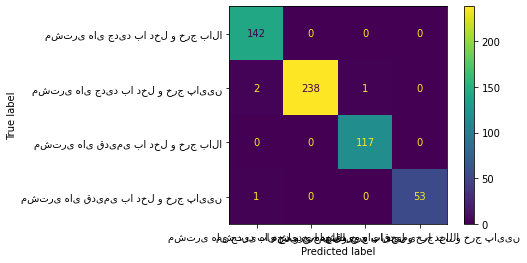

In [415]:
metrics.plot_confusion_matrix(clf, X_test, y_test, )

In [416]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
# you need to install graphviz on your own system

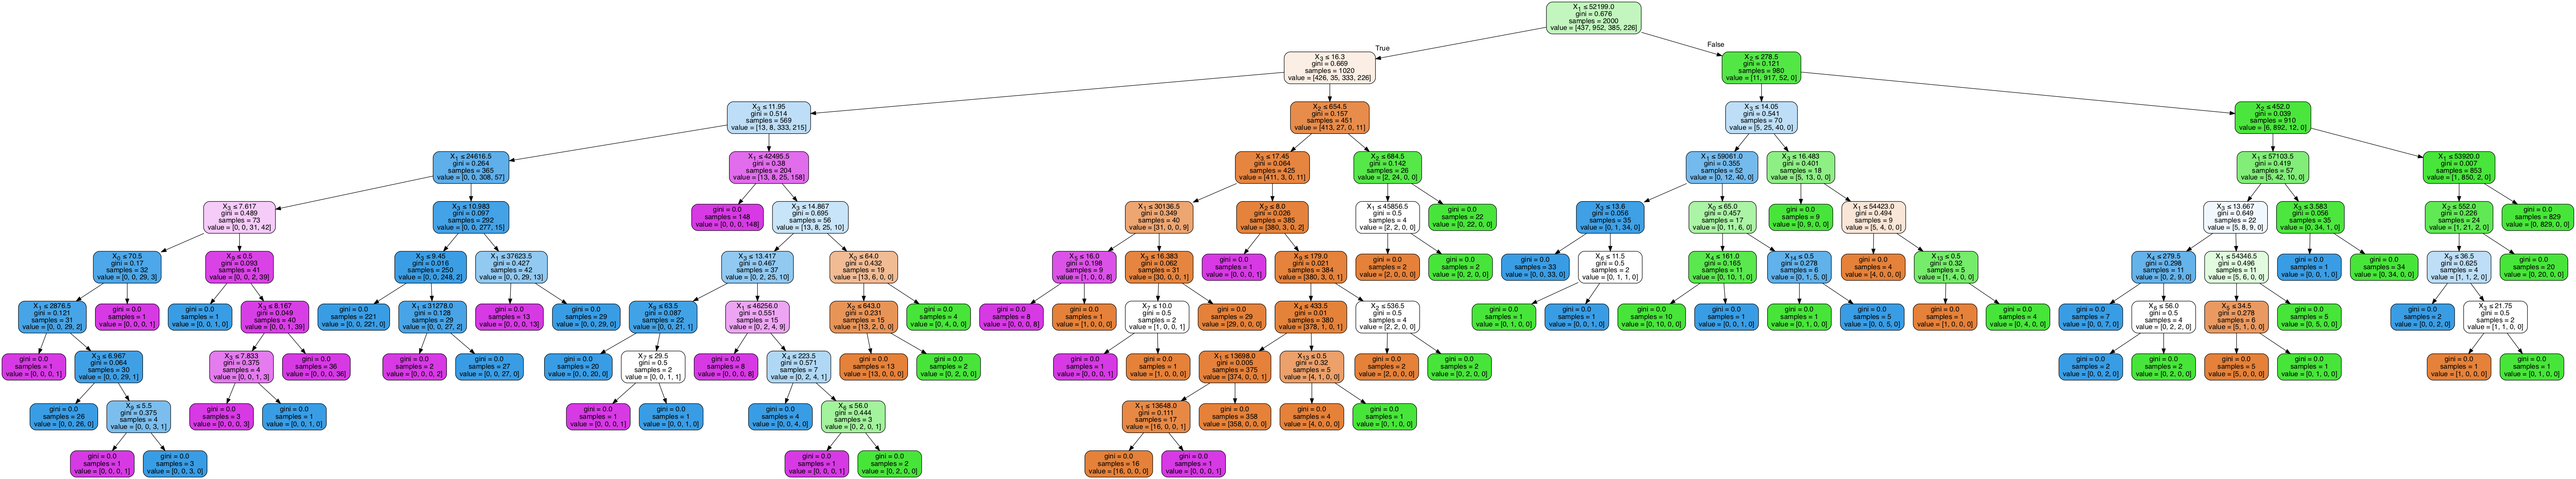

In [417]:
dot_date = StringIO()  # show object in input or output
export_graphviz(decision_tree, out_file=dot_date, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_date.getvalue())
Image(graph.create_png())

In [418]:
df_with_dummies.columns

Index(['Age', 'Income', 'Spending', 'Seniority', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Education_Postgraduate',
       'Education_Undergraduate', 'Marital_Status_Alone',
       'Marital_Status_In couple', 'Has_child_Has child', 'Has_child_No child',
       'Children_1 child', 'Children_2 children', 'Children_3 children',
       'Children_No child'],
      dtype='object')

# بررسی درخت تصمیم

همانطور که مشاهده میکنید از تقریبا ۲۲۵۰ داده سهم مشتری های جدید با دخل و خرج پایین بیشتر از مابقی میباشد در نود درخت
تقریبا ۱/۲ میباشد

### best split point :
- level-1 => x1 = Income
- level-2 => x2 = Spending , x3 = Seniority
- level-3 => x2 = Spending , x3 = Seniority
- level-4 => x1 = Income , x3 = Seniority
- level-5 => x0 = Age , x1 = Income ,x2 = Spending , x3 = Seniority
- level-6 => x0 = Age , x1 = Income , x3 = Spending , x5=Fruits , x9 =Gold
- level-7 => x2 = Income , x3 = Spending


به دلیل پیچیده شدن درخت بهتر است که درخت را هرس کنیم و از موارد تکراری صرف نظر کنیم

 هم چنین با درنظر گرفتن یک

gain

یا حد آستانه میتوانیم به این پی ببریم که در مقابل

impurity(gini)

ما میتوانیم با استفاده از یک حد استاده پیچیدگی را کمتر کنیم

و purity

را افزایش دهیم

(بهتر از از معیار entropy هم استفاده شود)

# k-means

 پیدا کردنِ مراکز خوشه k

به عنوان میانگین نقطه داده‌ای در دستور کار قرار دارد.

اینجا، تعداد خوشه‌ها
(k)

از قبل تعیین گردیده است و مدل سعی می‌کند بهینه‌ترین خوشه‌ها را بر این اساس پیدا کند.


در این روش و روش سلسه مراتبی به دلیل اینکه میل به سمت دایری شکل شدن هست

در نتیجه خوشه های دقیق تری بدست می آوریم

و همچنین فاصله نقاط کم هست اما روش اخر مناسب نیست

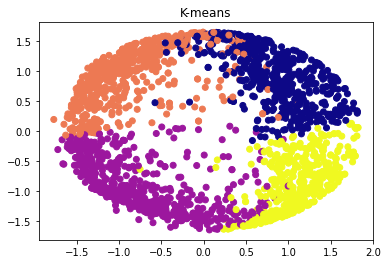

In [419]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
    plt.title("K-means")

kmeans(X,4)



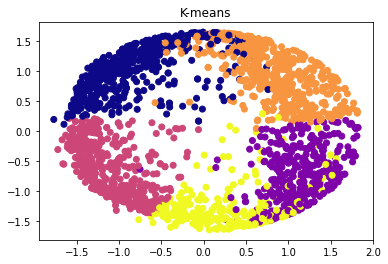

In [420]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
    plt.title("K-means")

kmeans(X,5)

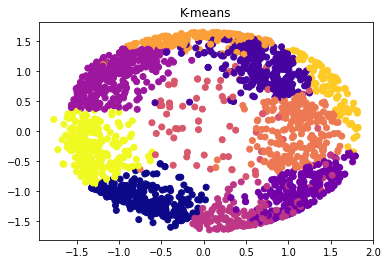

In [421]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
    plt.title("K-means")

kmeans(X,10)


# سلسه مراتبی



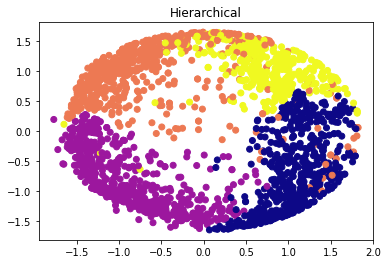

In [422]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.title("Hierarchical")


hier(X, 4)

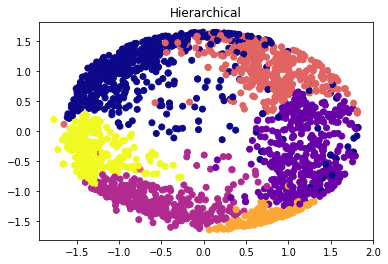

In [423]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.title("Hierarchical")


hier(X, 6)

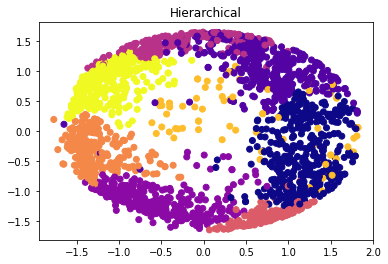

In [424]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.title("Hierarchical")


hier(X, 8)

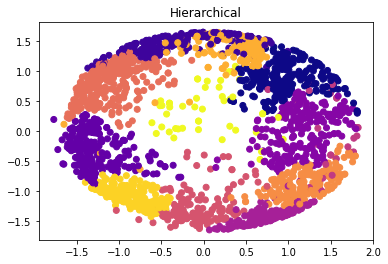

In [425]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.title("Hierarchical")


hier(X, 12)

# DBSCAN

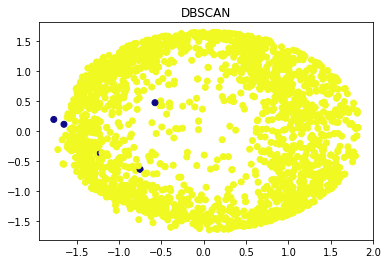

In [426]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
    plt.title("DBSCAN")


dbscan(X, .5, 4)

# DBSCAN
اگر که ما  DBSCAN در روش

X رنج بندی شده را بهش بدهیم
به دلیل اینکه الگوریتم کم کم با فرض نقاط تصادفی شروع و بروزرسانی میشود تمام الگو ما به یک دسته پیشبینی میشود

همچنین هرچه تعداد نفطه هارا بالاتر ببریم خوشه های پیشبینی شده بیشتر میشوند.


.باشد، به عنوان همسایه آن نقطه در نظر گرفت می‌شود eps هر نقطه داده، از دیگر نقاط داده فاصله‌ای دارد. هر نقطه‌ای که فاصله‌اش با یک نقطه مفروض کمتر از

.محسوب می‌شود (Core) همسایه داشته باشد، یک نقطه «مرکزی» min_samples هر نقطه داده مفروضی که

